In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
np.random.seed(42)
sns.set()

In [2]:
num_simulations   = 1000

In [3]:
beauty_df = pd.read_csv("./ARM_Data_extra/examples/beauty/ProfEvaltnsBeautyPublic.csv")
mdl = smf.ols(data=beauty_df, formula="courseevaluation ~ age + female + nonenglish").fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     8.386
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           1.95e-05
Time:                        22:33:17   Log-Likelihood:                -371.39
No. Observations:                 463   AIC:                             750.8
Df Residuals:                     459   BIC:                             767.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3841      0.140     31.246      0.000       4.108       4.660
age           -0.0058      0.003     -2.169      0.031      -0.011      -0.001
female        -0.2003      0.053     -3.764      0.000      -0.305      -0.096
nonenglish    -0.3278      0.106     -3.102      0.002      -0.535      -0.120
==============================================================================
Omnibus:                       17.265   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.488
Skew:                          -0.489   Prob(JB):                     9.67e-05
Kurtosis:                       3.012   Cond. No.                         279.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Trying to redo the [R source](https://www.rdocumentation.org/packages/arm/versions/1.10-1/source)

In [4]:
from scipy.stats import chi2, multivariate_normal
def sim_lm(mdl, num_simulations):
    coefs = mdl.params
    cov_matrix = mdl.cov_params()
    sigma = np.std(mdl.resid)
    for sigma_sim in sigma*np.sqrt((mdl.nobs - mdl.df_model)/chi2.rvs(df=mdl.nobs - mdl.df_model, size=num_simulations)):
        beta_sim = multivariate_normal.rvs(mean=mdl.params, cov=mdl.cov_params() * sigma_sim * sigma_sim, size=1)
        yield sigma_sim, beta_sim

In [5]:
case1_age        = 50
case1_female     = 1
case1_nonenglish = -1
case1_evaluation = -1
case2_age        = 60
case2_female     = 0
case2_nonenglish = -1
case2_evaluation = -0.5


In [6]:
case1_outcomes = np.array([])
for (sigma, beta) in sim_lm(mdl, 1000):
    case1_outcomes = np.append(case1_outcomes, np.sum(np.array([1, case1_age, case1_female, case1_nonenglish])*beta))
    
case2_outcomes = np.array([])
for (sigma, beta) in sim_lm(mdl, 1000):
    case2_outcomes = np.append(case2_outcomes, np.sum(np.array([1, case2_age, case2_female, case2_nonenglish])*beta))
    
cases_diff = case1_outcomes - case2_outcomes

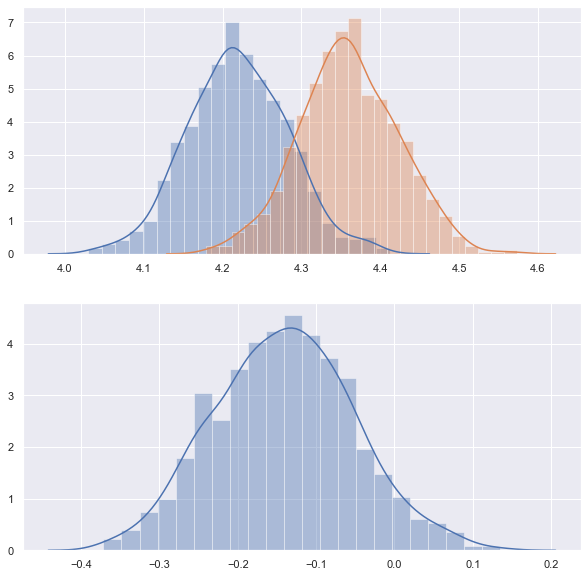

In [7]:
fig, (ax1, ax2) = plt.subplots(2,1)
sns.distplot(case1_outcomes, ax=ax1)
sns.distplot(case2_outcomes, ax=ax1)
sns.distplot(cases_diff, ax=ax2);
fig.set_size_inches(10, 10)

In [8]:
len(cases_diff[cases_diff>0])/len(cases_diff)

0.058